In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

In [2]:
# Import diabetes dataset
df = pd.read_csv("CECS456-FinalProject/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
category_mappings = {'Female':1, 'Male':0, 'Yes':1, 'No':0, 'Positive':1, 'Negative':0}
df_toInt = df.iloc[:, 1:17]
df = df.iloc[:, 0:1]
for column in df_toInt:
    df_toInt[column] = df_toInt[column].map(category_mappings)
df = df.join(df_toInt)
display(df)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9358974358974359


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9935897435897436


In [11]:
from sklearn.svm import SVC

In [12]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [13]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6538461538461539


In [14]:
#Determining prediction probabilities (Kenneth Valero)
r_probs = [0 for _ in range(len(y_test))]
lr_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:,1]
svm_probs = svm.predict_proba(X_test)[:,1]

In [15]:
#Importing functions for ROC/AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
#Calculating the ROC Curve (false positive rate vs. true positive rate) (Kenneth Valero)
random_fpr, random_tpr, threshold1 = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, threshold2 = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, threshold3 = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, threshold4 = roc_curve(y_test, svm_probs)

In [19]:
#calculating AUC
random_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)


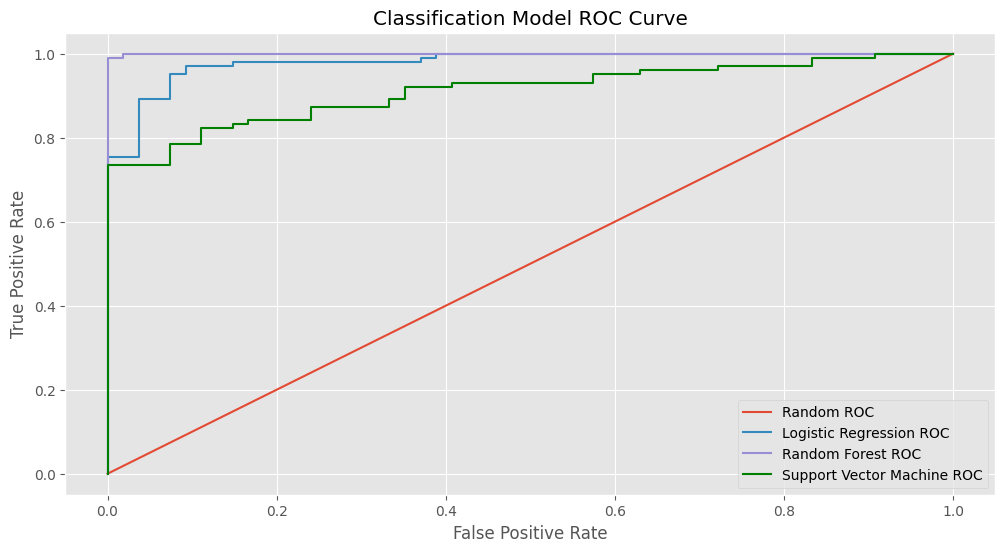

Random AUC = 0.500
Logistic Regression AUC = 0.980
Random Forest AUC = 1.000
Support Vector Machine AUC = 0.911


In [25]:
#plotting ROC
plt.plot(random_fpr, random_tpr, label='Random ROC')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression ROC')
plt.plot(rf_fpr, rf_tpr, label='Random Forest ROC')
plt.plot(svm_fpr, svm_tpr, color='green', label='Support Vector Machine ROC')
plt.title('Classification Model ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Random AUC = %.3f' % (random_auc))
print('Logistic Regression AUC = %.3f' % (lr_auc))
print('Random Forest AUC = %.3f' % (rf_auc))
print('Support Vector Machine AUC = %.3f' % (svm_auc))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25016314-3530-47b7-95b2-7fd0d302b441' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>